File Handling

@Authors: Sridhar Nerur, Samuel Jayarajan and Mahyar Vaghefi

By now, you should be comfortable with variables, strings, arithmetic operations, lists, sets, tuples, dictionaries, and functions. After completing this notebook, you will know how to read from and write to files. The notebook also shows you how to read in xlsx and csv files using Pandas, a very powerful library that is extensively used in data science.

A text file typically consists of a sequence of characters. It is normally stored in secondary memory and has to be retrieved and loaded into main memory for processing. The entire file can be read in as a string, or one may choose to extract just a few characters. We often find the newline character ("\n") embedded in the text. That is, a file may consist of many lines of text. We can also retrieve a line at a time, or all the lines at once.

Python provides a function called open() (surprise!) to access the contents of a file. Specifically, open() provides a "handle" to the file, allowing us to perform various operations on it. A typical sequence of operations would be:

1. Open the file for reading or writing
2. Read from or write to the file
3. Close the file

The open() function:
The open() function requires the filename and has a few other parameters that can be set. The contents of a file can be in bytes (b) or strings (default). The following examples show how the open() function can be used.

Example 1 (open to read a file):
open("readme.txt") ---> opens the file "readme.txt" for reading, which is the default mode
OR
open("readme.txt", "r") ---> same as above, but "r" (reading) mode is explicitly provided

Of course, this assumes that the file "readme.txt" exists in the current directory. If it is in a different directory, you need to specify the path as follows:

open("temp/readme.txt") --> look for the file in temp, a sub-directory in the current directory
OR
open("/Users/user_name/temp/readme.txt") --> complete path

If you wish to read the contents of the file as a byte stream, you can do the following:
open("readme.txt", "rb")

Example 2 (open to write to a file):
open("new_file.txt", "w") --> open a file called "new_file.txt" for writing as a string. 

NOTE: If you already have a file called "new_file.txt", it will be truncated and you will lose its contents.

open("new_file.txt", "wb") --> same as above, except that you are writing out a byte stream.

NOTE: You must close the file handle for the contents to be written to your file. See example:

outfile = open("new_file.txt", "wb")
txt = "This is a test"
outfile.write(txt)
outfile.close() #VERY IMPORTANT TO CLOSE THE FILE

MODES YOU CAN USE

r  --> Read Mode (this is the default); file should exist
w  --> Write Mode; if files exists, it will be truncated to size 0
r+ --> Read/write; files should exist; anything you write to it will be appended
a  --> Append mode; anything you write will be appended to the file
t  --> Text mode (this is the default)
b  --> Binary mode

SUMMARY OF FILE HANDLING METHODS

close()
read([size]) => if size is not provided, all the characters from current position to End-of-File (EOF) are returned
readline([size]) => size characters from current line are returned; if not provided, the entire line is returned
readlines() => reads all the lines into a list (note: \n will be included)
write(output)
writelines(output)

Let us try some these commands.....I have a file called quotes.txt that I will be using to show you how some of the methods work.


In [18]:
f = open("/Users/snerur/quotes.txt", "r") #note: the second parameter is not needed
txt = f.read() #read the entire file from the beginning to the end
txt

"To err is human but to screw up things you need a computer.\nIf education is expensive, try ignorance.\n\nWhen beggars die there are no comets seen.\nThe heavens themselves blaze forth the death of princes.\n--Shakespeare\nCowards die many times before their deaths.\nThe valiant never taste of death but once.\n--Shakespeare\n\n“The moving finger writes; and, having writ, moves on: nor all thy piety nor wit shall lure it back to cancel half a line, nor all thy tears wash out a word of it.\n-- Omar Khayyam\n\n“Tis all a Chequer-board of nights and days\nWhere Destiny with men for Pieces plays:\nHither and thither moves, and mates,and slays,\nAnd one by one back in the closet lays.”\n\n― Omar Khayyam\n\n“The boast of heraldry, the pomp of power, And all that beauty, all that wealth e'er gave, Awaits alike the inevitable hour. The paths of glory lead but to the grave.”\n-- Thomas Gray\n"

Note the "\n" character in the text. They represent newline characters. When you use the print statement, a newline will be inserted where the \n appears, as shown below.

In [19]:
print(txt)

To err is human but to screw up things you need a computer.
If education is expensive, try ignorance.

When beggars die there are no comets seen.
The heavens themselves blaze forth the death of princes.
--Shakespeare
Cowards die many times before their deaths.
The valiant never taste of death but once.
--Shakespeare

“The moving finger writes; and, having writ, moves on: nor all thy piety nor wit shall lure it back to cancel half a line, nor all thy tears wash out a word of it.
-- Omar Khayyam

“Tis all a Chequer-board of nights and days
Where Destiny with men for Pieces plays:
Hither and thither moves, and mates,and slays,
And one by one back in the closet lays.”

― Omar Khayyam

“The boast of heraldry, the pomp of power, And all that beauty, all that wealth e'er gave, Awaits alike the inevitable hour. The paths of glory lead but to the grave.”
-- Thomas Gray



When a file handle is obtained using the open() function, the cursor will be at the beginning of the file (at byte 0). When you use the f.read() command, the cursor advances one character at a time and the entire file is read in as a string. So, after the f.read() command is executed, the cursor will be at the end of the file. If you try f.read() again, you will get an empty string (see the cell below).

In [20]:
f.read()

''

In [21]:
#You can move the cursor back to the beginning of the file by using the
#seek method
f.seek(0)
#now try the f.read() command --- it should work
f.read()

"To err is human but to screw up things you need a computer.\nIf education is expensive, try ignorance.\n\nWhen beggars die there are no comets seen.\nThe heavens themselves blaze forth the death of princes.\n--Shakespeare\nCowards die many times before their deaths.\nThe valiant never taste of death but once.\n--Shakespeare\n\n“The moving finger writes; and, having writ, moves on: nor all thy piety nor wit shall lure it back to cancel half a line, nor all thy tears wash out a word of it.\n-- Omar Khayyam\n\n“Tis all a Chequer-board of nights and days\nWhere Destiny with men for Pieces plays:\nHither and thither moves, and mates,and slays,\nAnd one by one back in the closet lays.”\n\n― Omar Khayyam\n\n“The boast of heraldry, the pomp of power, And all that beauty, all that wealth e'er gave, Awaits alike the inevitable hour. The paths of glory lead but to the grave.”\n-- Thomas Gray\n"

In [22]:
f.close() #will close the file

In [23]:
#let us try to read in the lines
f = open("/Users/snerur/quotes.txt")
lines = f.readlines()
lines

['To err is human but to screw up things you need a computer.\n',
 'If education is expensive, try ignorance.\n',
 '\n',
 'When beggars die there are no comets seen.\n',
 'The heavens themselves blaze forth the death of princes.\n',
 '--Shakespeare\n',
 'Cowards die many times before their deaths.\n',
 'The valiant never taste of death but once.\n',
 '--Shakespeare\n',
 '\n',
 '“The moving finger writes; and, having writ, moves on: nor all thy piety nor wit shall lure it back to cancel half a line, nor all thy tears wash out a word of it.\n',
 '-- Omar Khayyam\n',
 '\n',
 '“Tis all a Chequer-board of nights and days\n',
 'Where Destiny with men for Pieces plays:\n',
 'Hither and thither moves, and mates,and slays,\n',
 'And one by one back in the closet lays.”\n',
 '\n',
 '― Omar Khayyam\n',
 '\n',
 "“The boast of heraldry, the pomp of power, And all that beauty, all that wealth e'er gave, Awaits alike the inevitable hour. The paths of glory lead but to the grave.”\n",
 '-- Thomas Gray

Note that the readlines() method reads all the lines into a list. Also, note that the newline character ("\n") is part of the line. Let us try readline() to read in just a line.

In [25]:
f.close()
f = open("/Users/snerur/quotes.txt")
line = f.readline() #reads a line and advances the cursor to the next line
line #will be a string

'To err is human but to screw up things you need a computer.\n'

In [26]:
#the cursor is now at the beginning of the second line
#let us read the first 20 characters from the current line
line2_20characters = f.readline(20)
line2_20characters

'If education is expe'

In [32]:
f.seek(0) #move the cursor back to the beginning of the file
#let us now display the first 20 characters of first line
f.read(20) #this reads in 20 characters and the cursor will be at the 21st character


'To err is human but '

In [33]:
#display the next 25 characters
f.read(25)

'to screw up things you ne'

In [34]:
#let us close the file
f.close()

Note that we have to remember to close the file every time. A better way to handle files is as follows (and this is what we would recommend).

with open("......", "r") as infile:
    txt = infile.read()
    Do something with txt

Note the indentation after the first line. THe indentation creates a block that scopes the file. The moment you exit the block (by going back to the beginning of the line), the file is automatically closed. 

Let us use this to add a new quote to the quotes.txt file.

In [36]:
quote = """Life isn't about finding yourself. Life is about creating yourself. \
\n-- George Bernard Shaw"""
with open("/Users/snerur/quotes.txt", "a+") as outfile:
    outfile.write(quote)

In [37]:
#let us check to see if our new quote has been added
with open("/Users/snerur/quotes.txt") as infile:
    txt = infile.read()
print(txt) #note that the file will be closed automatically

To err is human but to screw up things you need a computer.
If education is expensive, try ignorance.

When beggars die there are no comets seen.
The heavens themselves blaze forth the death of princes.
--Shakespeare
Cowards die many times before their deaths.
The valiant never taste of death but once.
--Shakespeare

“The moving finger writes; and, having writ, moves on: nor all thy piety nor wit shall lure it back to cancel half a line, nor all thy tears wash out a word of it.
-- Omar Khayyam

“Tis all a Chequer-board of nights and days
Where Destiny with men for Pieces plays:
Hither and thither moves, and mates,and slays,
And one by one back in the closet lays.”

― Omar Khayyam

“The boast of heraldry, the pomp of power, And all that beauty, all that wealth e'er gave, Awaits alike the inevitable hour. The paths of glory lead but to the grave.”
-- Thomas Gray
Life isn't about finding yourself. Life is about creating yourself. 
-- George Bernard Shaw


In the snippet where we wrote the new quote to the file, why didn't we use "w+" as the mode? Remember that "w" will wipe out the contents of the file. Therefore, we used "a+" which will allow us to append to the file.

In [38]:
#How many lines does the file have?
#One easy way to do it is to count the number of occurrences of "\n"
lines = txt.count("\n")
print(lines)

23


In [39]:
#How many words do we have in the file?
#One way to do find out is to split the string to get the words 
#into a list and then get the length of the list
words = txt.split()
print("Number of words in file is: ", len(words))

Number of words in file is:  172


In [40]:
#Let us get the frequency of each word in the file
#We will create a dictionary with word as the key and frequency of 
#occurrence as the value
word_counts = {} #empty dictionary
for word in words:
    word_counts[word] = word_counts.get(word, 0) + 1 #remember the get() method?
print(word_counts)    

{'To': 1, 'err': 1, 'is': 3, 'human': 1, 'but': 3, 'to': 3, 'screw': 1, 'up': 1, 'things': 1, 'you': 1, 'need': 1, 'a': 4, 'computer.': 1, 'If': 1, 'education': 1, 'expensive,': 1, 'try': 1, 'ignorance.': 1, 'When': 1, 'beggars': 1, 'die': 2, 'there': 1, 'are': 1, 'no': 1, 'comets': 1, 'seen.': 1, 'The': 3, 'heavens': 1, 'themselves': 1, 'blaze': 1, 'forth': 1, 'the': 5, 'death': 2, 'of': 7, 'princes.': 1, '--Shakespeare': 2, 'Cowards': 1, 'many': 1, 'times': 1, 'before': 1, 'their': 1, 'deaths.': 1, 'valiant': 1, 'never': 1, 'taste': 1, 'once.': 1, '“The': 2, 'moving': 1, 'finger': 1, 'writes;': 1, 'and,': 1, 'having': 1, 'writ,': 1, 'moves': 1, 'on:': 1, 'nor': 3, 'all': 5, 'thy': 2, 'piety': 1, 'wit': 1, 'shall': 1, 'lure': 1, 'it': 1, 'back': 2, 'cancel': 1, 'half': 1, 'line,': 1, 'tears': 1, 'wash': 1, 'out': 1, 'word': 1, 'it.': 1, '--': 3, 'Omar': 2, 'Khayyam': 2, '“Tis': 1, 'Chequer-board': 1, 'nights': 1, 'and': 3, 'days': 1, 'Where': 1, 'Destiny': 1, 'with': 1, 'men': 1, 'for

Now that we know how to read from and write to text files, let us turn our attention to xlsx/csv files. We will use a package called Pandas for this purpose. This is a very very basic introduction to Pandas. 

In this notebook, we will show you how to read from a spreadsheet and then examine the contents. Pandas stores everything in a structure called "Dataframe", which is a tabular format that resembles tables in a database. We will use a file called "iris.csv", a csv file that is often used to teach data science. The way you read from a csv file is as follows:

import pandas as pd
df = pd.read_csv("iris.csv", sep = ",") #sep is the field separator, comma by default

To read from an excel file, we use read_excel instead of read_csv. 

In [42]:
import pandas as pd
df = pd.read_csv("/Users/snerur/Dropbox/sparkExamples/iris.csv")
df.head() #display the first five rows of the dataframe

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The iris dataset consists of four predictors or independent variables (sepallength, sepalwidth, petallength, and petalwidth) and a target variable called "class". The goal is to predict the class (species of a flower) based on the four predictors. To see the different species in the "class" column, we can do the following.

In [43]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

df['class'] looks only at the "class" column. The unique() method in this example shows you the unique strings in the "class" column. As you can see, there are 3 of them. 

1. To see the values of any column, say petallength, we do the following:
df['petallength']
2. To see more than one column (say, sepallength and petalwidth), we do the following:
df[['sepallength', 'petalwidth']]
3. To get some descriptive statistics about the columns, you can do the following:
df.describe()
4. If you wish to get all the column names, you can do the following:
df.columns

Let us try some of these.....

In [44]:
df['petallength']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petallength, Length: 150, dtype: float64

In [45]:
df[['sepallength', 'petalwidth']]

,sepallength,petalwidth
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
...,...,...
145,6.7,2.3
146,6.3,1.9
147,6.5,2.0
148,6.2,2.3


In [46]:
#get descriptive statistics
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
#you can get the transpose of the previous output by doing this...
df.describe().T #T is for transpose

,count,mean,std,min,25%,50%,75%,max
sepallength,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepalwidth,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petallength,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petalwidth,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


As you can see, the describe() method gives you the number of observations, mean, standard deviation, minimum value, maximum value, and the 25th, 50th, and 75th percentiles. Pretty neat, isn't it.
There's more...if we wish to display records that have more than average "sepalwidth" (i.e., more than 3.054 as shown above), we can do the following.

In [48]:
df[df['sepalwidth'] > 3.054]

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica


67 of the 150 observations have more than average sepalwidth. Just a few more things before we wrap up...

In [49]:
df.corr() #get the correlations among the variables

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


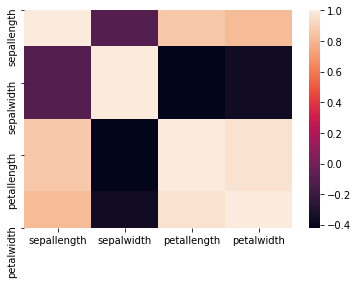

In [51]:
#Don't like the output? Want a heatmap instead? Let us use seaborn
import seaborn as sns #NOTE: the package seaborn has to be installed
#You may install seaborn by typing: pip install seaborn at the command prompt
sns.heatmap(df.corr())

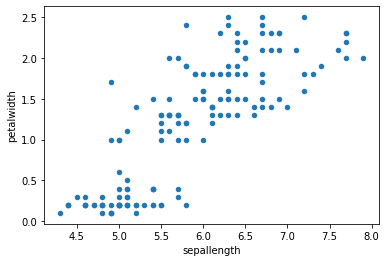

In [54]:
#Looks like sepallength is highly correlated with both
#petallength and petalwidth. Let us plot them....
df.plot(x = 'sepallength', y = 'petalwidth', kind = 'scatter')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1378f70b8>,
      dtype=object)

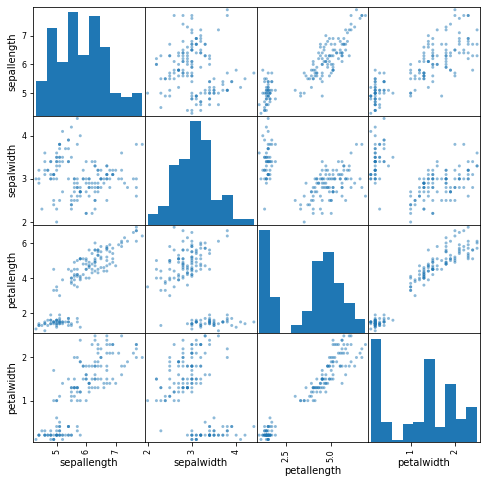

In [58]:
#if you want to look at plots of all relationships, you can use
#a scatter matrix as follows
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (8, 8))

Almost done. Just one last thing. How do we write a dataframe to a spreadsheet or a csv file? We will show you how to quickly create a dataframe and write it to an excel sheet.

In [59]:
movie_reviews = {'User': ['George', 'Peter', 'Nancy', 'Peter'],
                 'Movie': ['The Jungle Book', 'ET', '21', 'Star Wars'],
                 'Rating': [4.0, 3.5, 5.0, 2.0]}
#Note that the lists are of the same length - these are the records
#Let us put this dictionary in a tabular format using a DataFrame
movie_df = pd.DataFrame(movie_reviews)
movie_df

,User,Movie,Rating
0,George,The Jungle Book,4.0
1,Peter,ET,3.5
2,Nancy,21,5.0
3,Peter,Star Wars,2.0


In [ ]:
#Writing the dataframe to external files
movie_df.to_excel("movie_reviews.xlsx")
movie_df.to_csv("movie_reviews.csv")

A Note on Pickle

Python has a module called "pickle" that allows one to convert a Python object hierarchy to a byte stream. It can also convert a serialized Python object hierarchy stored as bytes in a file back to the Python object hierarchy. See https://docs.python.org/3/library/pickle.html for details.

The following examples demonstrate how pickle and "unpickle" work.

In [61]:
import pickle

games = ["cricket", "tennis", "soccer"]
physicists = ["Einstein", "Planck", "Bohr"]

with open("my_lists.dat", "wb") as outfile:
    pickle.dump(games, outfile) #serializes games and stores it as bytes
    pickle.dump(physicists, outfile) #same with physicists

#Your directory should now have a file called my_lists.dat

In [63]:
#let us read the two lists back
with open("my_lists.dat", "rb") as infile:
    my_games = pickle.load(infile)
    my_physicists = pickle.load(infile)
print(my_games)
print(my_physicists)

['cricket', 'tennis', 'soccer']
['Einstein', 'Planck', 'Bohr']
